### Master of Applied Artificial Intelligence

**Course: TC4033 - Computational Vision for Images and Video**

<img src="./../assets/logo.png" alt="Image Alt Text" width="500"/>

**Region growing**

Tutor: Dr. Gilberto Ochoa


Team members:
* Alfonso de Lucas Espinosa - A01795118
* Ignacio Jose Aguilar Garcia - A00819762
* Alejandro Calderon Aguilar - A01795353
* Ricardo Mar Cupido - A01795394
* Mario Fonseca Martinez - A01795228

### Importing Libraries <a class="anchor" id="libraries" ></a>

In [1]:
import cv2
import matplotlib.pyplot as plt
from scipy import signal as sig
import numpy as np
from PIL import Image

### Region Growing Algorithm

In [39]:
class RegionGrowing():
    def __init__(self):
        pass
    
    def __call__(self, seed, image, threshold, dist=4, max_it = 1e6):
        x0, y0 = seed
        mask = np.zeros(image.shape)
        visited_pixels = np.zeros(image.shape)
        N, M = image.shape
        stack = []
        stack.append((x0, y0))
        it = 0
        while len(stack) > 0:
            x0, y0 = stack.pop()
            neighbours = self._N4(x0, y0, M,N) if dist == 4  else self._N8(x0, y0, M, N)
            for x1, y1 in neighbours:
                if self._distance(x0, y0, x1, y1, image) <= threshold and mask[y1,x1] == 0 and visited_pixels[y1, x1] == 0:
                    stack.append((x1, y1))
            mask[y0, x0] = 1
            visited_pixels[y0, x0] = 1
            it = it + 1
            if it > max_it:
                print("overgrowing")
                break
        return mask

    def _distance(self, x0, y0, x1, y1, image):
        v0 = image[y0, x0]
        v1 = image[y1, x1]
        return abs(v1 - v0)

    def _N4(self, x0, y0, M, N):
        # List to store neighbours
        neighbours = []

        # 4-connected neighbours (horizontal and vertical)
        if x0 + 1 < M:
            # Bottom
            neighbours.append((x0 + 1, y0))
        if 0 < x0 - 1:
            # Top
            neighbours.append((x0 - 1, y0))
        if y0 + 1 < N:
            # Right
            neighbours.append((x0, y0 + 1))
        if 0 < y0 - 1:
            # Left
            neighbours.append((x0, y0 - 1))
        
        # return neighbours
        return neighbours

    def _N8(self, x0, y0, M, N):
        # horizontal an vertical neighbours
        neighbours = self._N4(x0, y0, M, N)
        
        # 4 additional diagonal neighbors
        if x0 + 1 < M and y0 + 1 < N:
            # Bottom-right
            neighbours.append((x0 + 1, y0 + 1))
        if x0 + 1 < M and 0 < y0 - 1:
            # Bottom-left
            neighbours.append((x0 + 1, y0 - 1))
        if 0 < x0 - 1 and y0 + 1 < N:
            # Top-right
            neighbours.append((x0 - 1, y0 + 1))
        if 0 < x0 - 1 and 0 < y0 - 1:
            # Top-left
            neighbours.append((x0 - 1, y0 - 1))
            
        # return neighbours
        return neighbours
    
    def set_seed(self, image, seed, seed_size=2):
        xx, yy = np.meshgrid(np.arange(image.shape[1]), np.arange(image.shape[0]))
        x0, y0 = seed

        # draw a circle around the seed
        flag = np.zeros(image.shape)
        flag[((xx - x0)**2 + (yy - y0)**2) < seed_size**2] = 125
        
        return image + flag

### plot images method

In [4]:
def plot_images(images=[], labels=[], nrows=1, ncols=2, figsize=(12,8), cmap="gray", hideAxis=True):
    """
    Plots a list of images in a grid layout using Matplotlib.

    Parameters:
    images (list): List of images to be plotted.
    labels (list): List of labels for each image. Default is an empty list.
    nrows (int): Number of rows in the grid. Default is 1.
    ncols (int): Number of columns in the grid. Default is 2.
    figsize (tuple): Size of the figure in inches. Default is (12, 8).
    cmap (str): Colormap to be used for displaying the images. Default is "gray".

    Returns:
    None
    """

    # set the subplots
    fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=figsize)
    # Iterate over each axis defined in M*N as flat
    for i, ax in enumerate(axs.flat):
        # validates that the dimensions of axs fits with images array parameter
        if i < len(images):
            # plot the image
            ax.imshow(images[i], cmap=cmap)
            # if there are labels defined then set a title
            if len(labels) > 0:
                ax.set_title(labels[i])
            # dont show the axis ticks
            if hideAxis:
                ax.axis("off")
        else:
            # dont show an empty plot
            ax.axis("off")
    # fits the plots
    plt.tight_layout()
    plt.show()

### Creating an image to test region growing

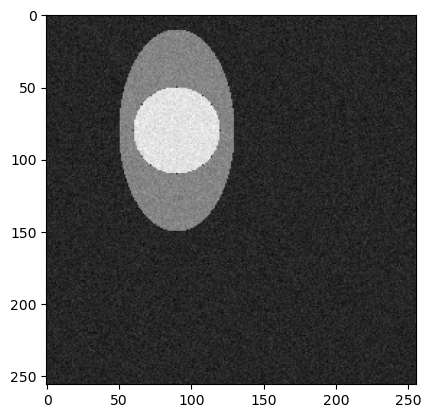

In [43]:
xx, yy = np.meshgrid(np.arange(256), np.arange(256))
img = np.zeros((256, 256))

rr0 = (xx-90)**2 + (yy-80)**2
img[rr0 < 30**2] = 20.0

# contiguous region
rr1 = (xx-90)**2/40**2 + (yy-80)**2/70**2
img[(rr0 > 30.0**2)*(rr1 < 1.0)] = 10.0

noise = np.random.normal(0,1, img.shape)

img = img + noise

plt.imshow(img, cmap="gray")

### Instance of Region Growing class

In [44]:
regionGrowing = RegionGrowing()

### Define a seed in the image

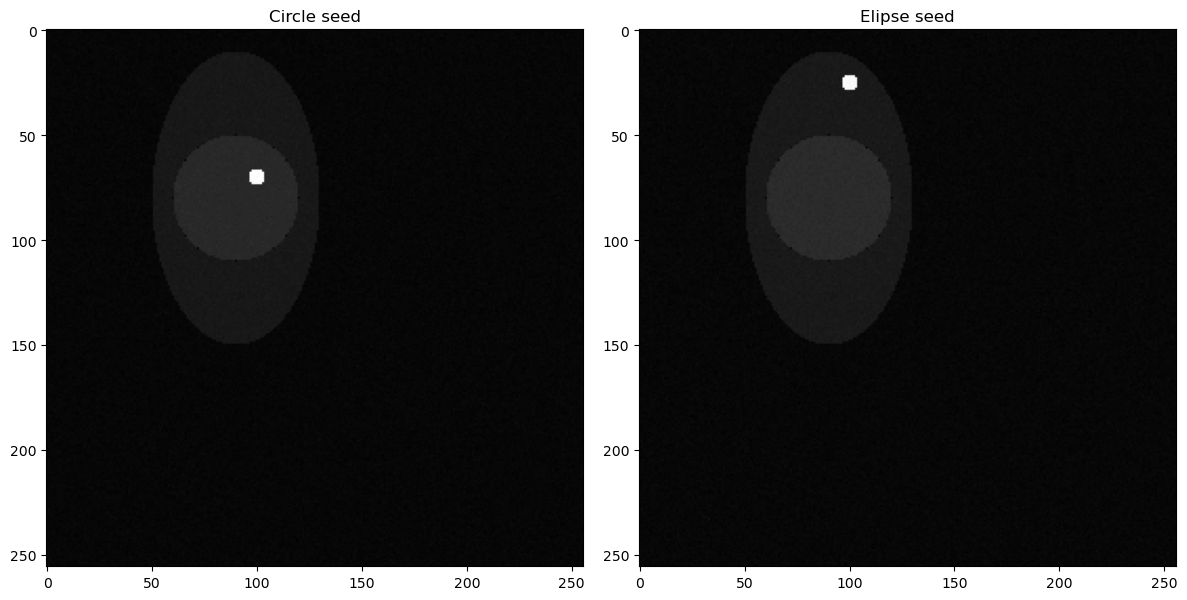

In [47]:
# using a sedd
circle_seed = (100, 70)
elipse_seed = (100, 25)

# draw a circle around the seed
circle_flag =  regionGrowing.set_seed(image=img, seed=circle_seed, seed_size=4)
elipse_flag =  regionGrowing.set_seed(image=img, seed=elipse_seed, seed_size=4)

labels = ["Circle seed", "Elipse seed"]

plot_images([circle_flag, elipse_flag], labels, hideAxis=False)

### Plot the region

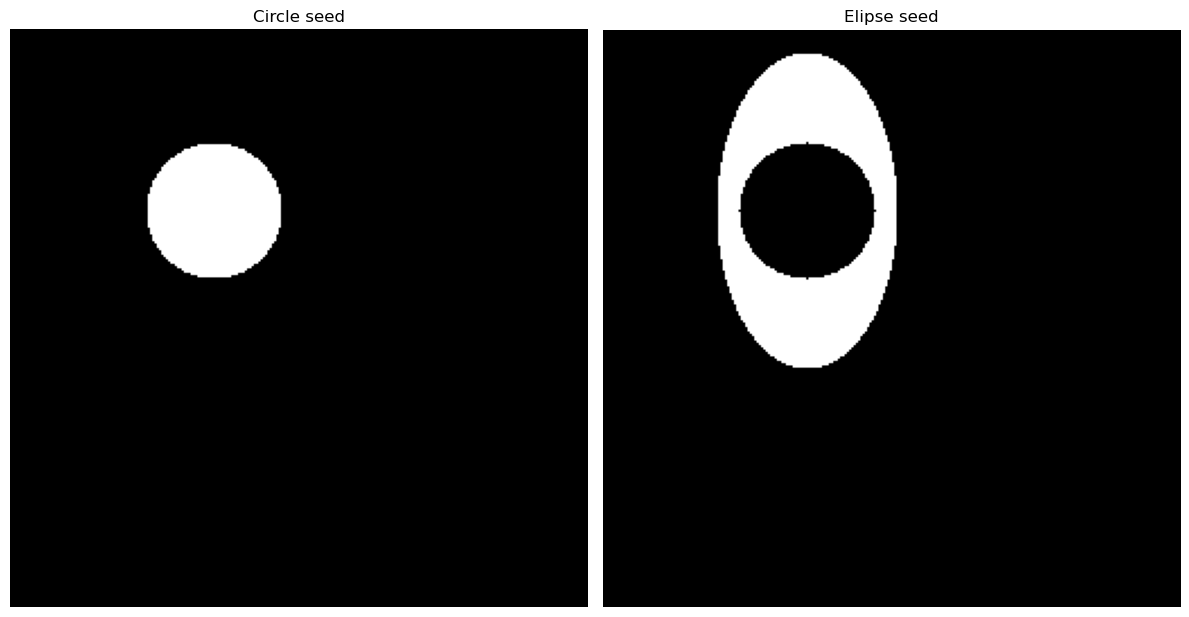

In [48]:
circle_mask = regionGrowing(seed=circle_seed, image=img, threshold=4)
elipse_mask = regionGrowing(seed=elipse_seed, image=img, threshold=4)

plot_images([circle_mask, elipse_mask], labels)

### Region growing in medical imaging

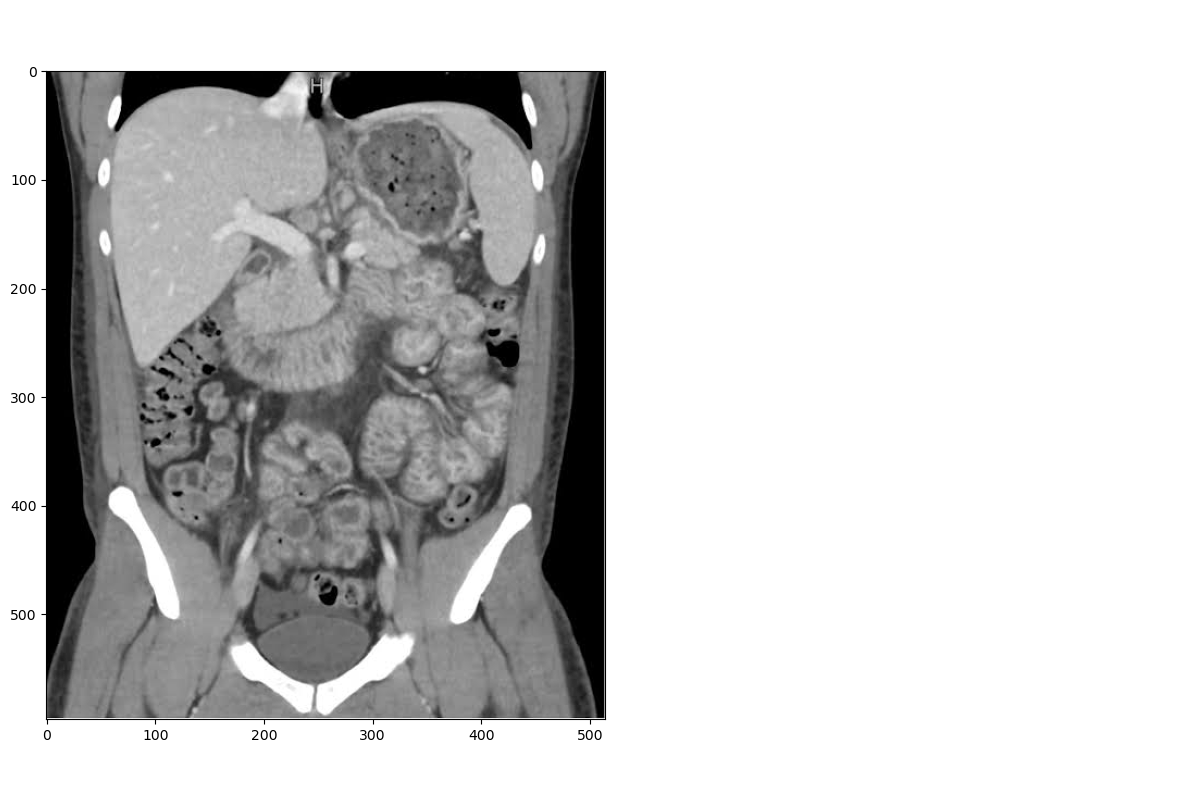

In [34]:
corp_image = cv2.imread("data/corps.JPG")
gray_corps_image = cv2.cvtColor(corp_image, cv2.COLOR_BGR2GRAY)

plot_images([gray_corps_image], hideAxis=False)

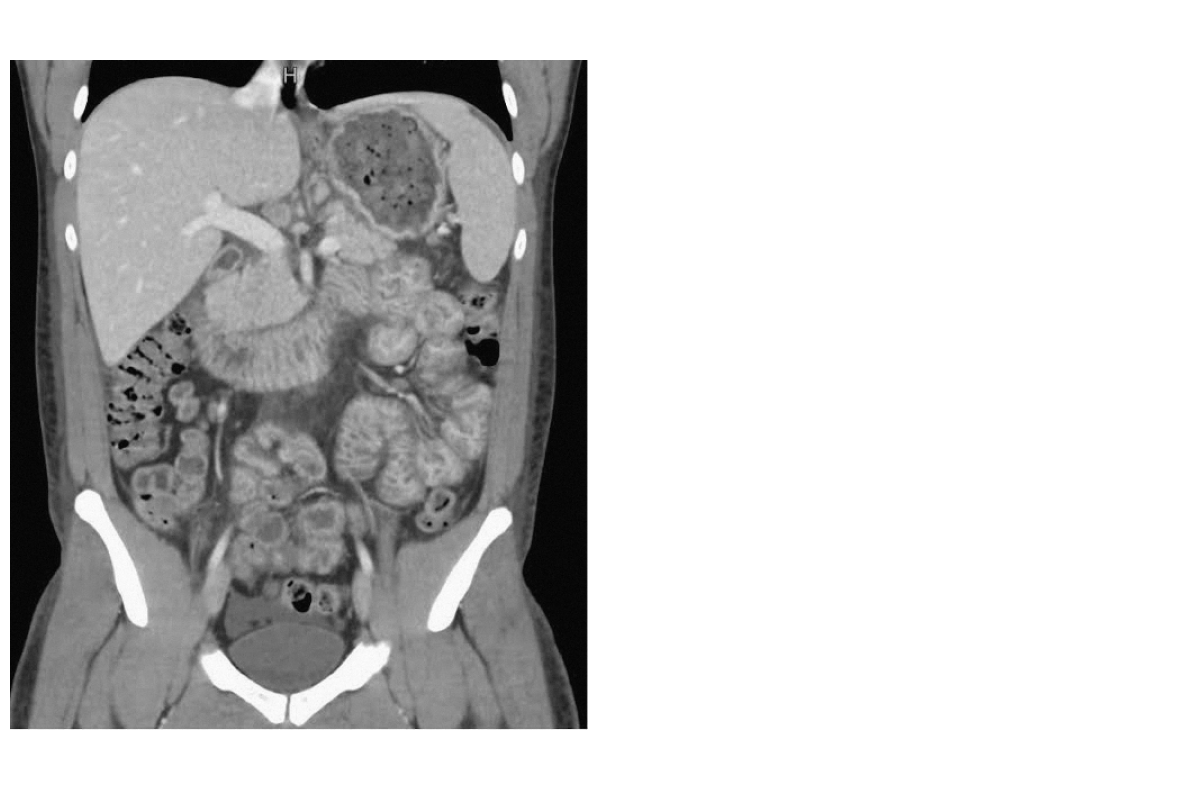

In [35]:
corps_noise = np.random.normal(0, 2, gray_corps_image.shape)
gray_corps_image = gray_corps_image + corps_noise

plot_images([gray_corps_image])

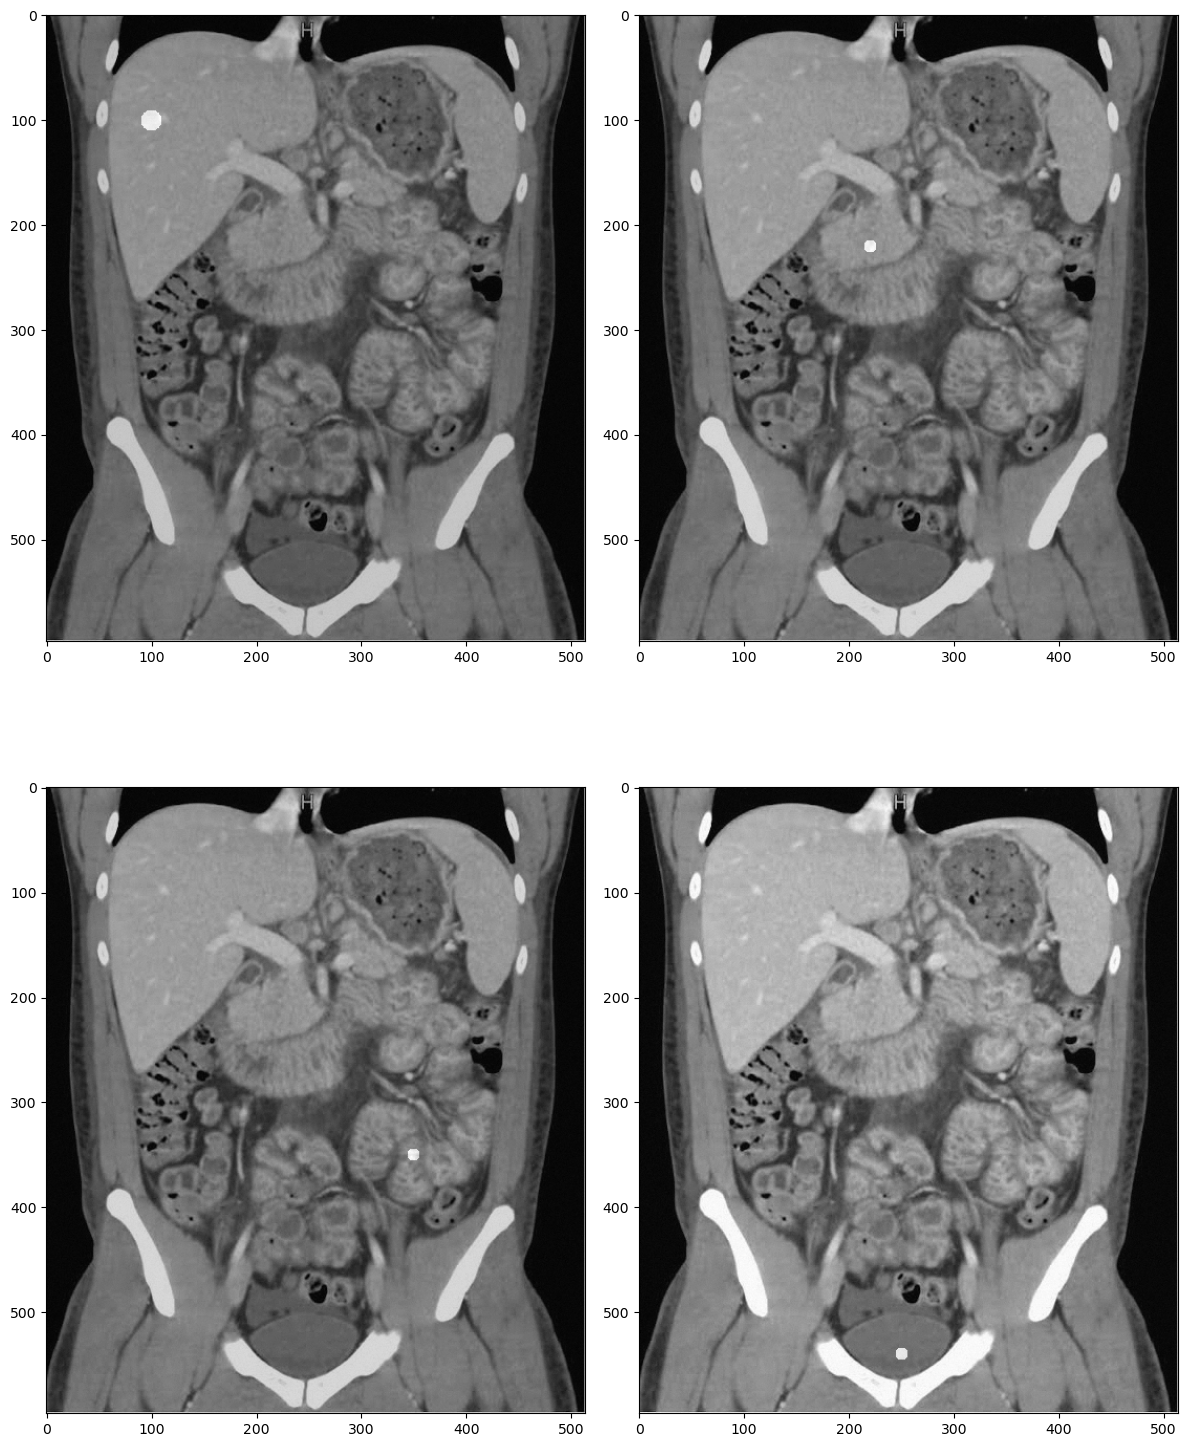

In [28]:
corps_seed = (100, 100)
corps_seed2 = (220,220)
corps_seed3 = (350, 350)
corps_seed4 = (250,540)

seed_img1 = set_seed(gray_corps_image, corps_seed, 10)
seed_img2 = set_seed(gray_corps_image, corps_seed2, 6)
seed_img3 = set_seed(gray_corps_image, corps_seed3, 6)
seed_img4 = set_seed(gray_corps_image, corps_seed4, 6)

plot_images([seed_img1, seed_img2, seed_img3, seed_img4], hideAxis=False, figsize=(12,16), ncols=2, nrows=2)

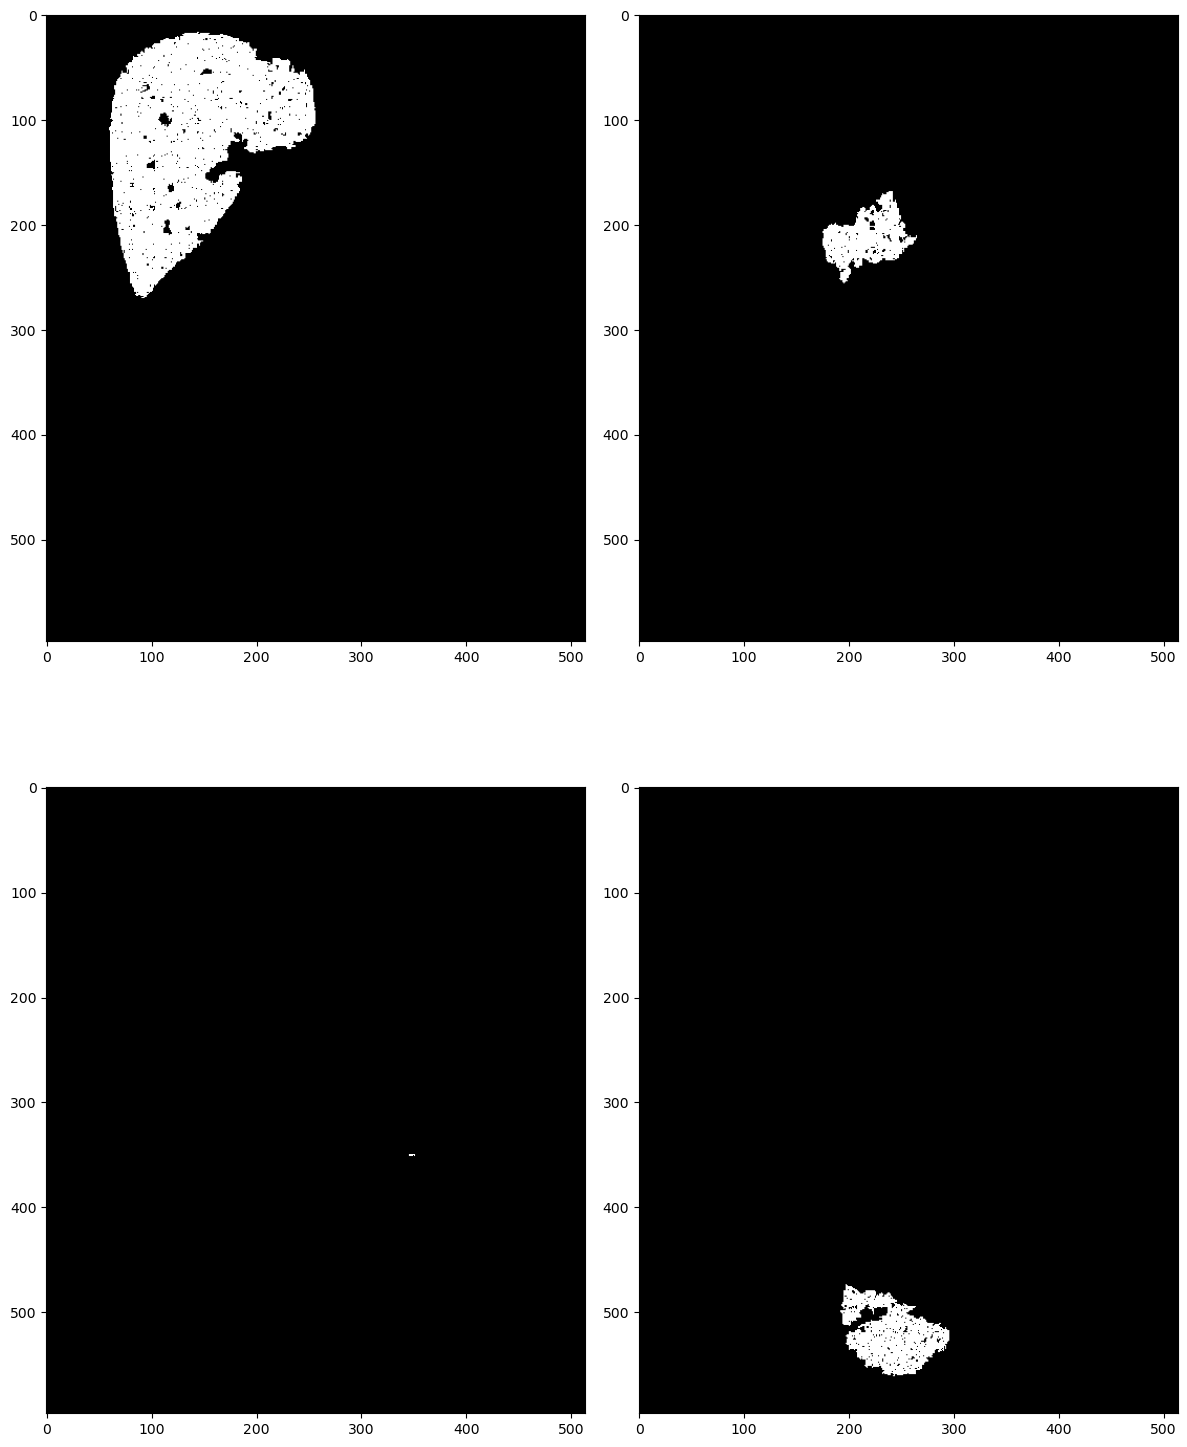

In [100]:
corps_mask = grow(corps_seed, gray_corps_image, 4, distance)
corps_organ_mask2 = grow(corps_seed2, gray_corps_image, 4, distance)
corps_organ_mask3 = grow(corps_seed3, gray_corps_image, 4, distance)
corps_organ_mask4 = grow(corps_seed4, gray_corps_image, 3, distance)

plot_images([corps_mask, corps_organ_mask2, corps_organ_mask3, corps_organ_mask4], hideAxis=False, figsize=(12,16), ncols=2, nrows=2)

In [101]:
def plot_region_growing(image, mask, color=(0,255, 0)):

    if mask.dtype != np.uint8:
        mask = cv2.convertScaleAbs(mask)

    # create a blank color image with the same shape as the original image
    color_mask = np.zeros_like(image, dtype=np.uint8)
    # fill with the chosen color
    color_mask[:] = color

    # apply the mask to create a colored region
    colored_region = cv2.bitwise_and(color_mask, color_mask, mask=mask)

    # invert the mask to keep only the unmasked region of the original image
    mask_inv = cv2.bitwise_not(mask)
    
    if mask_inv.dtype != np.uint8:
        mask_inv = cv2.convertScaleAbs(mask_inv)

    # keeping only the original image where the mask is NOT applied
    background = cv2.bitwise_and(image, image, mask=mask_inv)

    # merging the original image with the colored mask region
    final_image = cv2.add(background, colored_region)
    
    return final_image

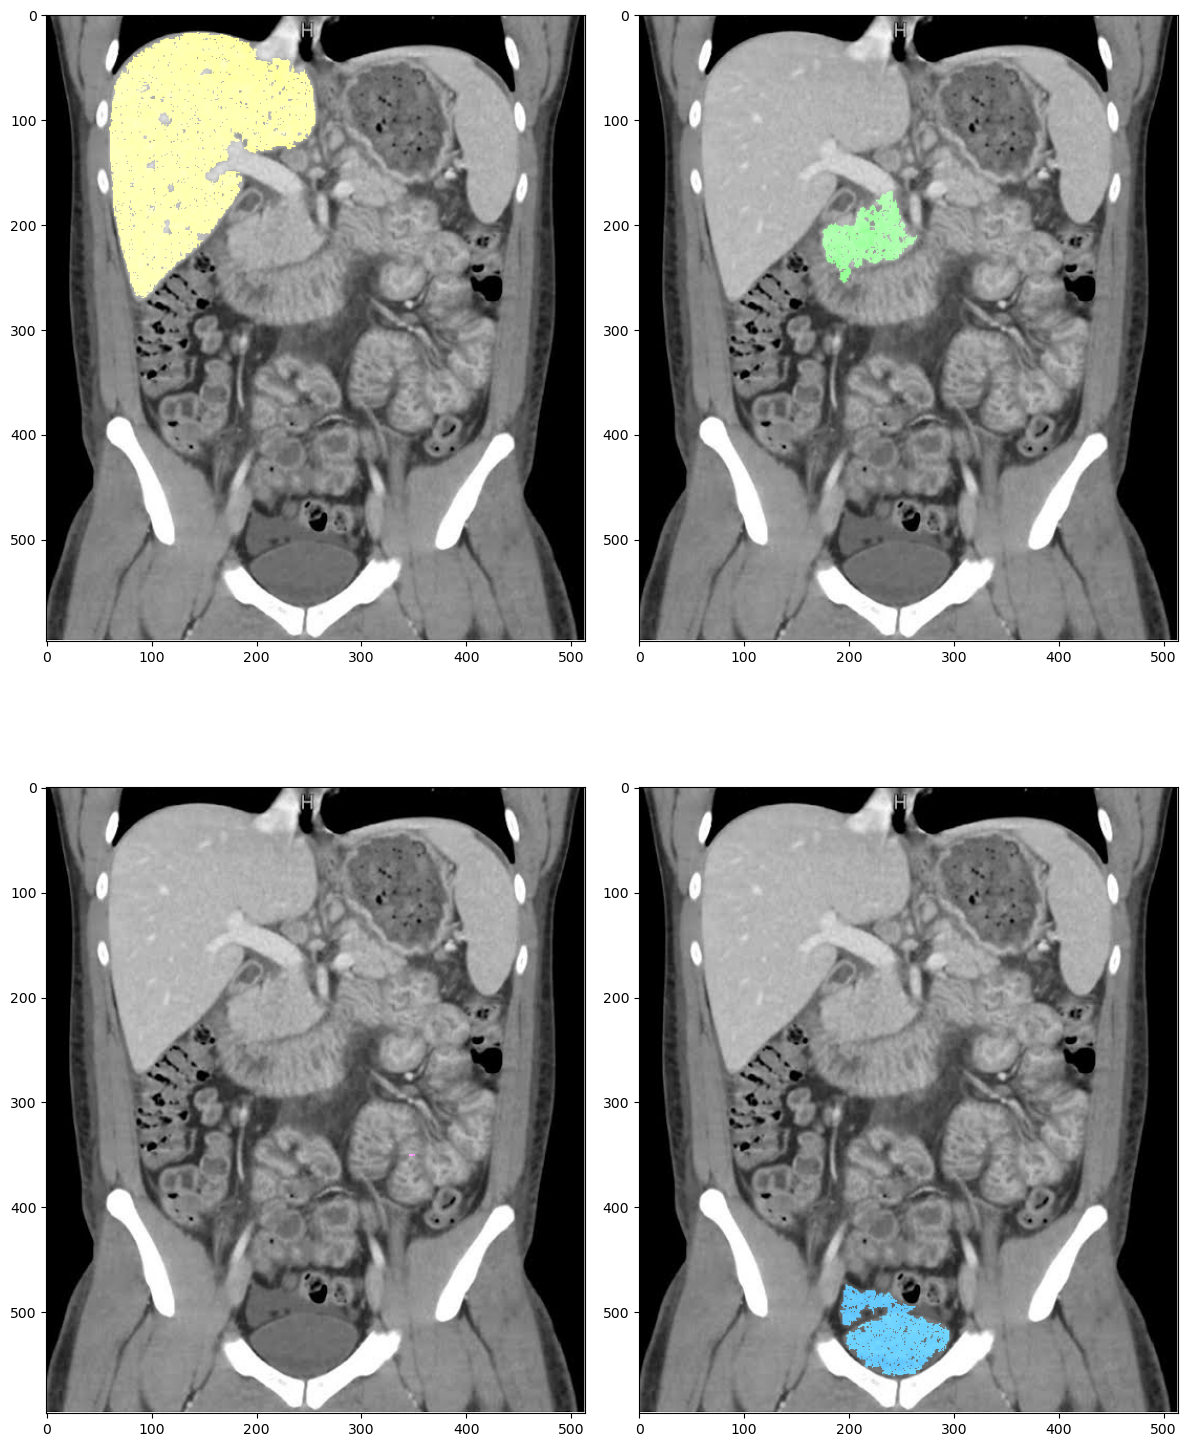

In [ ]:
corps_region = plot_region_growing(corp_image, corps_mask, color=(255, 100, 0))
corps_organ_region2 = plot_region_growing(corp_image, corps_organ_mask2, color=(0, 255, 0))
corps_organ_region3 = plot_region_growing(corp_image, corps_organ_mask3, color=(255, 0, 255))
corps_organ_region4 = plot_region_growing(corp_image, corps_organ_mask4, color=(0, 100, 255))

plot_images([corps_region,corps_organ_region2, corps_organ_region3, corps_organ_region4], hideAxis=False, figsize=(12,16), ncols=2, nrows=2)


### References

1. paper
2. DRIVE - Grand Challenge. (n.d.). grand-challenge.org. https://drive.grand-challenge.org/